In [25]:
import pandas as pd

In [26]:
news = pd.read_csv('raw_analyst_ratings.csv')

In [27]:
news

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


In [28]:
news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [29]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [30]:
 missing_values = news.isnull().sum()
missing_values[missing_values > 0]



Series([], dtype: int64)

So, from the above we can see the basic structure of the data provided.<br>This data has total number of 1407328 rows and 6 column<br>all the useful data types are objects<br>There is no messing value provided in the data so I can say that this is a clean data

In [31]:
news.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

# Descriptive Analysis<br>
On the descriptive analysis I will go through the understanding of of each columns information

On the head line column first I will go through text data analysis

In [32]:
unique_headlines = news['headline'].nunique()
print(f"Number of unique headlines: {unique_headlines}")


Number of unique headlines: 845770


In [33]:
news['headline_length'] = news['headline'].apply(len)
avg_headline_length = news['headline_length'].mean()
print(f"Average length of headlines: {avg_headline_length:.2f} characters")



Average length of headlines: 73.12 characters


In [34]:
common_words = news['headline'].str.lower().str.contains('stocks|market|buy|sell').sum()
print(f"Number of headlines containing 'stocks' or 'market': {common_words}")


Number of headlines containing 'stocks' or 'market': 374156


In [35]:

unique_urls = news['url'].nunique()
print(f"Number of unique URLs: {unique_urls}")


Number of unique URLs: 883429


In [36]:

news['domain'] = news['url'].apply(lambda x: x.split('/')[2])
domain_counts = news['domain'].value_counts()
print("Top 5 most frequent domains:")
print(domain_counts.head())

Top 5 most frequent domains:
domain
www.benzinga.com    1407328
Name: count, dtype: int64


In [37]:
unique_publishers = news['publisher'].nunique()
print(f"Number of unique publishers: {unique_publishers}")


Number of unique publishers: 1034


In [38]:
publisher_counts = news['publisher'].value_counts()
print("Top 5 most frequent publishers:")
print(publisher_counts.head())

Top 5 most frequent publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


The Date entries need to convert to Date time format because it is given in string object type

In [39]:
news['date'] = pd.to_datetime(news['date'], errors='coerce', utc='True')

In [40]:
date_range = news['date'].agg([min, max])
print(f"Date range: {date_range['min']} to {date_range['max']}")

C:\Users\mama\AppData\Local\Temp\ipykernel_7920\1649777631.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  date_range = news['date'].agg([min, max])
C:\Users\mama\AppData\Local\Temp\ipykernel_7920\1649777631.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  date_range = news['date'].agg([min, max])


Date range: 2011-04-28 01:01:48+00:00 to 2020-06-11 21:12:35+00:00


In [41]:
# Frequency of articles by month/year
articles_per_month = news['date'].dt.to_period('M').value_counts().sort_index()
print("Number of articles per month:")
print(articles_per_month)


C:\Users\mama\AppData\Local\Temp\ipykernel_7920\1108811487.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  articles_per_month = news['date'].dt.to_period('M').value_counts().sort_index()


Number of articles per month:
date
2011-04       6
2011-05      78
2011-06      95
2011-07     137
2011-08     149
           ... 
2020-02    2355
2020-03    4681
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


From the Data Stock colomn lets get information

In [42]:
unique_stocks = news['stock'].nunique()
print(f"Number of unique stocks mentioned: {unique_stocks}")


Number of unique stocks mentioned: 6204


In [43]:
stock_counts = news['stock'].value_counts()
print("Top 5 most frequently mentioned stocks:")
print(stock_counts.head())

Top 5 most frequently mentioned stocks:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
Name: count, dtype: int64


## Sentiment Analysis

In [44]:
from textblob import TextBlob

For our Project the useful Stock ticker Are 7 which are AAPL, AMZN, GOOG, META, MSFT, NVA, TSLA<br>so here I need to group out this companys sentimet scores

In [45]:
tickers_of_interest = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'TSLA', 'META']

# Filter the DataFrame for these specific stock tickers
news_filtered = news[news['stock'].isin(tickers_of_interest)]

# Display the filtered DataFrame
print(news_filtered)

         Unnamed: 0                                           headline  \
6680           7120  Tech Stocks And FAANGS Strong Again To Start D...   
6681           7121      10 Biggest Price Target Changes For Wednesday   
6682           7122  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   
6683           7123  Deutsche Bank Maintains Buy on Apple, Raises P...   
6684           7124  Apple To Let Users Trade In Their Mac Computer...   
...             ...                                                ...   
1257091     1263065   Electrek.Co Tweet: Tesla's head of Europe is out   
1257092     1263066  Tesla's Q2 Delivery Number Could Cause A Big Move   
1257093     1263067  'Tesla Electric Airplane? Elon Musk sees elect...   
1257094     1263068  UPDATE: JMP Reiterates Outperform, $347 Target...   
1257095     1263069  Tesla shares are trading higher after JMP Secu...   

                                                       url          publisher  \
6680     https://www.benzinga.

In [46]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the filtered DataFrame
news_filtered['Sentiment'] = news_filtered['headline'].apply(get_sentiment)

# Display the DataFrame with sentiment scores
print(news_filtered[['stock', 'headline', 'Sentiment']])

        stock                                           headline  Sentiment
6680     AAPL  Tech Stocks And FAANGS Strong Again To Start D...   0.433333
6681     AAPL      10 Biggest Price Target Changes For Wednesday   0.000000
6682     AAPL  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...   0.500000
6683     AAPL  Deutsche Bank Maintains Buy on Apple, Raises P...   0.000000
6684     AAPL  Apple To Let Users Trade In Their Mac Computer...   0.000000
...       ...                                                ...        ...
1257091  TSLA   Electrek.Co Tweet: Tesla's head of Europe is out   0.000000
1257092  TSLA  Tesla's Q2 Delivery Number Could Cause A Big Move   0.000000
1257093  TSLA  'Tesla Electric Airplane? Elon Musk sees elect...   0.000000
1257094  TSLA  UPDATE: JMP Reiterates Outperform, $347 Target...   0.066667
1257095  TSLA  Tesla shares are trading higher after JMP Secu...   0.250000

[7319 rows x 3 columns]


C:\Users\mama\AppData\Local\Temp\ipykernel_7920\2657113607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_filtered['Sentiment'] = news_filtered['headline'].apply(get_sentiment)


In [47]:
ticker_sentiment = news_filtered.groupby('stock')['Sentiment'].mean().reset_index()

# Display the sentiment scores for each stock ticker
print(ticker_sentiment)

   stock  Sentiment
0   AAPL   0.054114
1   AMZN   0.040260
2  GOOGL   0.053494
3   NVDA   0.073766
4   TSLA   0.061557


C:\Users\mama\AppData\Local\Temp\ipykernel_7920\3293070118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stock', y='Sentiment', data=ticker_sentiment, palette='coolwarm')


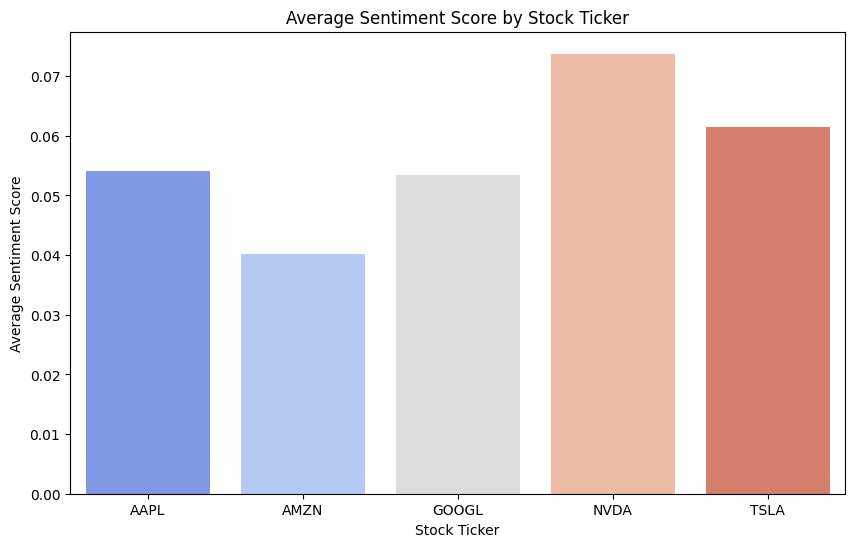

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='stock', y='Sentiment', data=ticker_sentiment, palette='coolwarm')

plt.title('Average Sentiment Score by Stock Ticker')
plt.xlabel('Stock Ticker')
plt.ylabel('Average Sentiment Score')
plt.show()

On the given data set there is no Microsoft and Meta company Stock ticker information<br>
But from 5 filtered companys scored sentiment:<br> NVDA might have higher average sentiment scores, indicating positive news coverage.<br>AMZN have a lower sentiment score, indicating more negative news coverage.

## Time Series Analysis

How does the publication frequency vary over time?

In [49]:
news_publication_frequency = news.groupby(news['date'].dt.date).size()

# Convert the result to a DataFrame
news_publication_frequency = news_publication_frequency.to_frame(name='publication_count')

# Reset the index to make 'date' a column again
news_publication_frequency.reset_index(inplace=True)

# Rename the 'index' column to 'date'
news_publication_frequency.rename(columns={'date': 'publication_date'}, inplace=True)

# Display the first few rows of the publication frequency data
print(news_publication_frequency.head())

  publication_date  publication_count
0       2011-04-28                  3
1       2011-04-29                  2
2       2011-04-30                  1
3       2011-05-01                  1
4       2011-05-02                  9


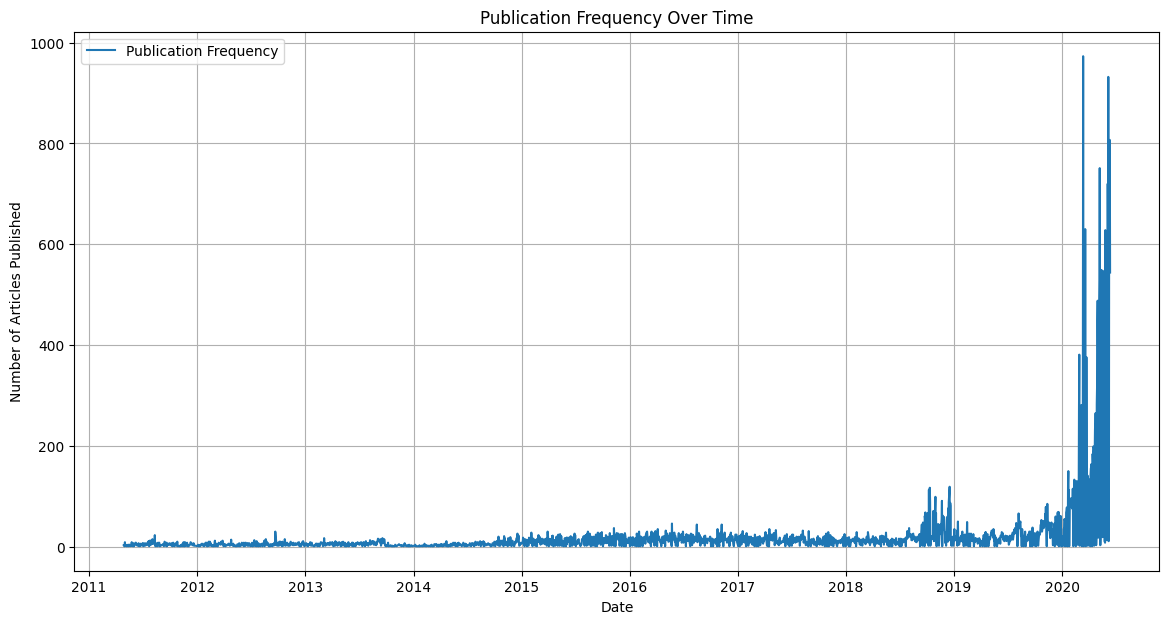

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(news_publication_frequency['publication_date'], news_publication_frequency['publication_count'], label='Publication Frequency')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.legend()
plt.grid(True)
plt.show()

Clearly shown that The publication frequency increase to the days after 2020.

In [51]:
news['date'] = pd.to_datetime(news['date'], errors='coerce', utc='True')

In [52]:
from datetime import datetime, timedelta

# Calculate the date 5 years ago from today in UTC
five_years_ago = datetime.now(tz=pd.Timestamp.utcnow().tz) - timedelta(days=5*365)

# Filter the dataset to include only the last 5 years
news_last_5_years = news[news['date'] >= five_years_ago]



In [53]:
news_publication_frequency = news_last_5_years.groupby(news_last_5_years['date'].dt.date).size()

# Convert the series to a DataFrame
news_publication_frequency = news_publication_frequency.to_frame(name='publication_count')

# Reset the index to make 'date' a column again
news_publication_frequency.reset_index(inplace=True)

# Rename the 'index' column to 'publication_date'
news_publication_frequency.rename(columns={'index': 'publication_date'}, inplace=True)

# Display the first few rows to verify
print(news_publication_frequency.head())

         date  publication_count
0  2019-09-05                 16
1  2019-09-06                 12
2  2019-09-09                 25
3  2019-09-10                 16
4  2019-09-11                 20


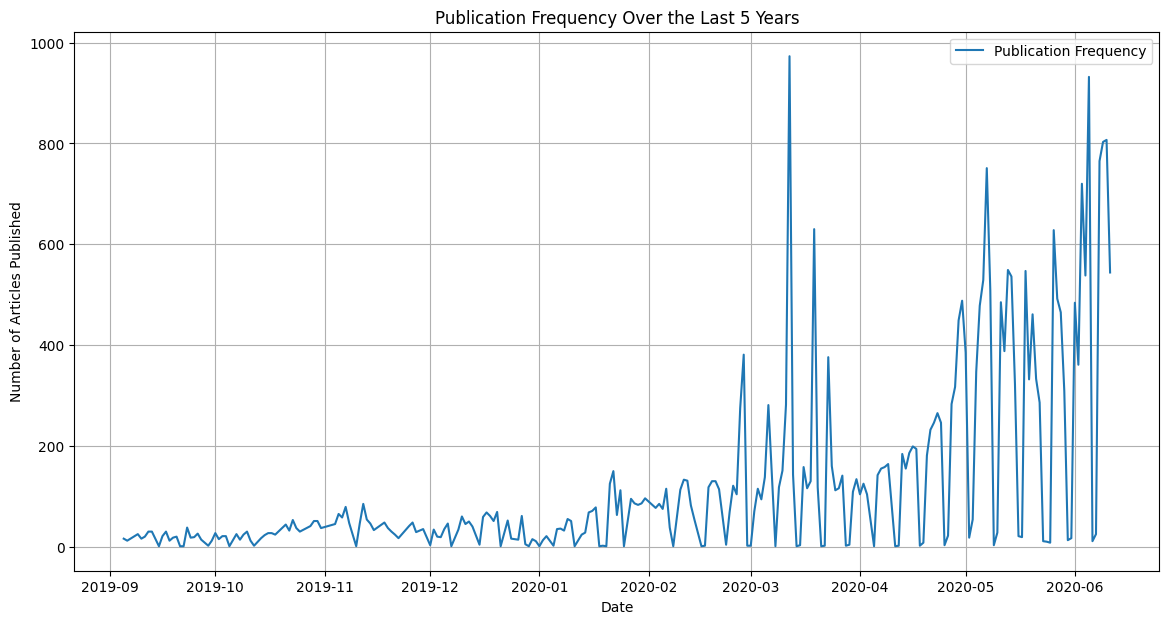

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(news_publication_frequency['date'], news_publication_frequency['publication_count'], label='Publication Frequency')
plt.title('Publication Frequency Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.legend()
plt.grid(True)
plt.show()

Starting from late days of feb 2020 until march 2020 There were More number of Articles published.<br> but the larger spike was seen in the middle of march 2020 and also in may 2020.

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [58]:
# Count headlines per day
daily_headlines = news.groupby('date').size()


In [59]:
# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'Date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('Date', inplace=True)

In [60]:
print(time_series_data)

                           Headlines_Count
Date                                      
2011-04-28 01:01:48+00:00                1
2011-04-28 17:49:29+00:00                1
2011-04-28 19:00:36+00:00                1
2011-04-29 17:47:06+00:00                1
2011-04-29 20:11:05+00:00                1
...                                    ...
2020-06-11 20:49:41+00:00                1
2020-06-11 20:51:33+00:00                1
2020-06-11 21:01:39+00:00                1
2020-06-11 21:11:20+00:00                1
2020-06-11 21:12:35+00:00                1

[36011 rows x 1 columns]


In [70]:
filtered_df =time_series_data[time_series_data['Headlines_Count'] >= 3]
print(filtered_df)

                           Headlines_Count
Date                                      
2011-05-02 07:24:46+00:00                3
2011-05-02 21:12:39+00:00                4
2011-05-25 04:36:09+00:00                4
2011-06-08 08:45:23+00:00                3
2011-06-17 06:50:57+00:00                4
...                                    ...
2020-06-11 15:47:01+00:00                6
2020-06-11 16:18:22+00:00                9
2020-06-11 16:19:17+00:00                4
2020-06-11 16:47:56+00:00                3
2020-06-11 18:26:26+00:00                4

[2083 rows x 1 columns]


In [64]:
import numpy as np

In [78]:

# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2019-01-01", end="2023-02-01", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)


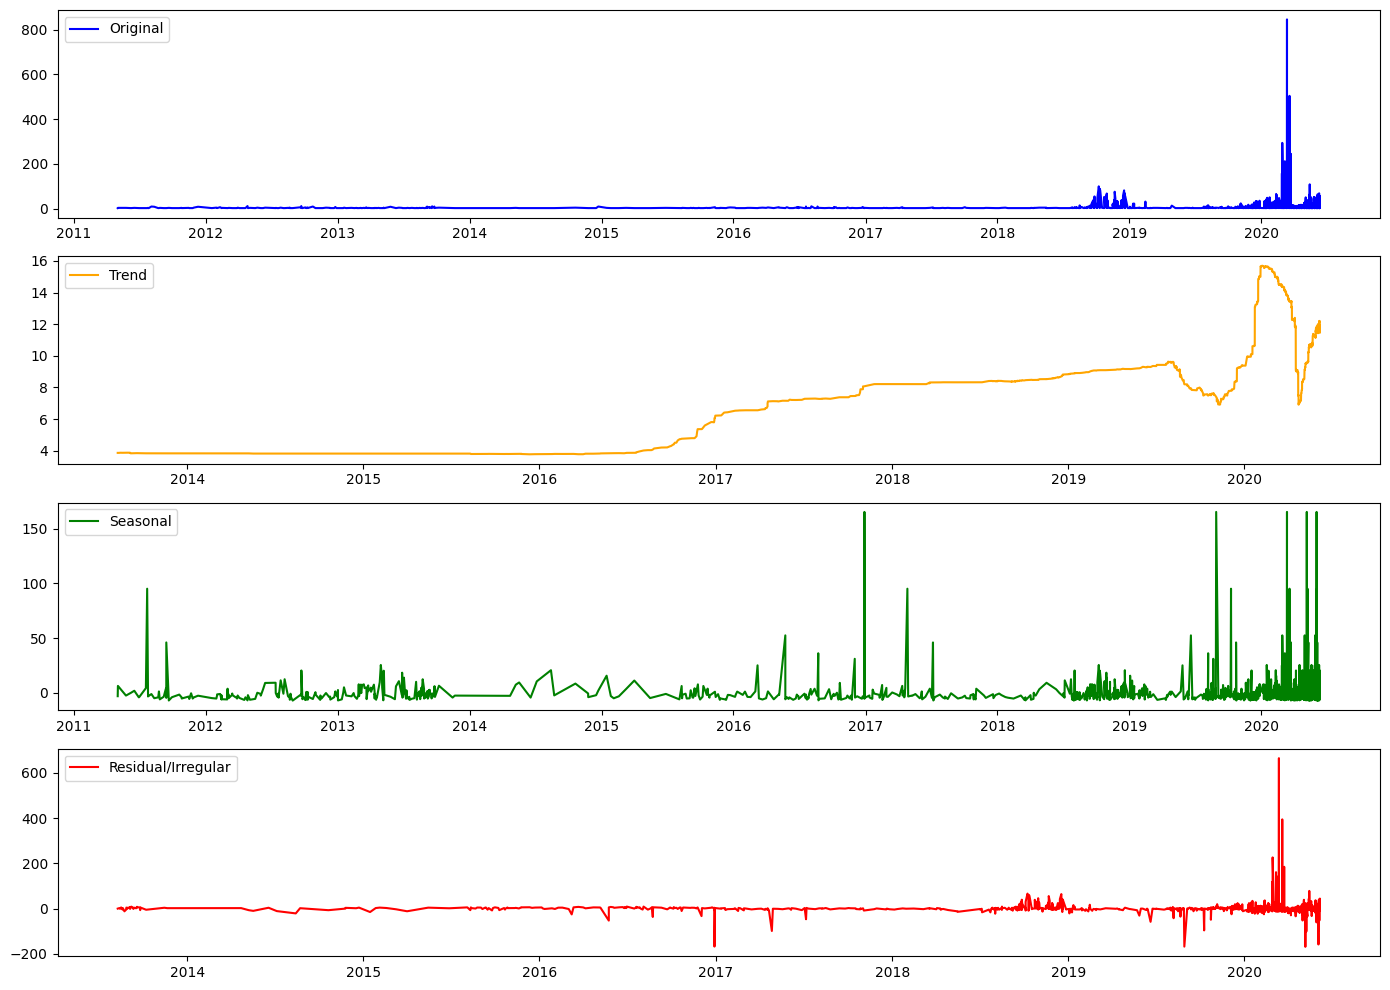

In [80]:

decomposition = seasonal_decompose(filtered_df['Headlines_Count'], model='additive', period=365)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(filtered_df['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()